**Descrição Colunas:** 
Year_Birth:Customer's year of birth

Education:Customer’s level of education

Marital_Status:Customer’s marital status

Income:Customer’s yearly household income

Kidhome:Number of small children in customer’s household

Teenhome: Number of teenagers in customer’s household

Dt_Customer: Date of customer’s enrolment with the company

Recency: Number of days since the last purchase

MntWines: Amount spent on wine products in the last 2 years

NumDealsPurchases: Number of purchases made with discount

NumWebPurchases: Number of purchases made through company’s web site

NumCatalogPurchases: Number of purchases made using catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of purchases made through company’s web site

Z_CostContact: Cost to contact a customer

Z_Revenue: Revenue after client accepting campaign

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Data Extraction**

In [42]:
import pandas as pd

df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/IEEE Período 1/marketing_campaign.xlsx")

display(df.describe())
display(df.info())
display(df.head())


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

None

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

**Data Cleaning**

In [4]:
#identifica os valores faltantes em ordem decrescente
df.isnull().sum().sort_values(ascending = False) #observa-se 24 valores faltantes no campo 'income' de 2240

#deleta os valores faltantes
df1 = df.dropna()

#deleta colunas irrelevantes para a análise web
df_web = df1.drop(columns = ["AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1",	"AcceptedCmp2"])

df_web["KidTeen"] = df_web["Kidhome"]+df_web["Teenhome"]

df_web["Year_Birth"] =  2021 - df_web['Year_Birth'] 

df_web.rename(columns= {"Year_Birth":"Age"}, inplace=True)

#df_web = df_web.drop(columns = "Year_Birth")



df_web
#apresenta a proporção de cada valor para uma coluna
display(df1["Marital_Status"].value_counts(normalize = True))
display(df1["Education"].value_counts(normalize = True))



Married     0.386733
Together    0.258574
Single      0.212545
Divorced    0.104693
Widow       0.034296
Alone       0.001354
Absurd      0.000903
YOLO        0.000903
Name: Marital_Status, dtype: float64

Graduation    0.503610
PhD           0.217058
Master        0.164711
2n Cycle      0.090253
Basic         0.024368
Name: Education, dtype: float64

**Data Wrangling**

In [41]:
#agrupa os valores por status de relacionamento e normaliza pela média
df_web_mean_marital_status = df_web.groupby(by = 'Marital_Status', as_index = False).mean()
df_web_mean_marital_status = df_web_mean_marital_status.drop(columns = 'ID')
display(df_web_mean_marital_status)

#Agrupa os valores por grau educacional e normaliza os valores pela média
df_web_mean_education = df_web.groupby(by = 'Education', as_index = False).mean()
df_web_mean_education = df_web_mean_education.drop(columns = 'ID')
display(df_web_mean_education)



,Marital_Status,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,KidTeen
0,Absurd,46.000000,72365.500000,0.000000,0.000000,53.000000,355.500000,84.500000,312.500000,205.500000,30.500000,204.000000,2.000000,3.500000,7.500000,6.500000,1.500000,0.000000,3.0,11.0,0.500000,0.000000
1,Alone,48.000000,43789.000000,1.000000,0.666667,30.333333,184.666667,4.000000,26.333333,7.666667,7.000000,27.000000,3.666667,5.000000,0.666667,4.000000,6.333333,0.000000,3.0,11.0,0.333333,1.666667
2,Divorced,54.724138,52834.228448,0.413793,0.590517,49.487069,324.844828,27.426724,150.206897,35.043103,26.818966,46.288793,2.435345,4.310345,2.672414,5.818966,5.487069,0.008621,3.0,11.0,0.206897,1.004310
3,Married,51.431739,51724.978996,0.453909,0.511085,48.310385,299.855309,25.648775,160.896149,35.466744,26.751459,42.845974,2.382730,4.085181,2.630105,5.849475,5.355893,0.009335,3.0,11.0,0.114352,0.964994
4,Single,49.428875,50995.350318,0.456476,0.401274,49.199575,291.331210,27.261146,184.849257,38.772824,27.072187,43.305732,2.131635,3.851380,2.632696,5.677282,5.280255,0.012739,3.0,11.0,0.225053,0.857749
5,Together,53.253054,53245.534031,0.450262,0.528796,49.989529,308.403141,25.500873,166.446771,39.062827,26.232112,43.200698,2.328098,4.102967,2.678883,5.755672,5.277487,0.008726,3.0,11.0,0.104712,0.979058
6,Widow,62.236842,56481.552632,0.236842,0.644737,48.802632,367.131579,31.868421,185.328947,49.907895,37.868421,55.855263,2.355263,4.618421,3.302632,6.355263,4.934211,0.000000,3.0,11.0,0.236842,0.881579
7,YOLO,48.000000,48432.000000,0.000000,1.000000,3.000000,322.000000,3.000000,50.000000,4.000000,3.000000,42.000000,5.000000,7.000000,1.000000,6.000000,8.000000,0.000000,3.0,11.0,0.500000,1.000000


,Education,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,KidTeen
0,2n Cycle,48.970000,47633.190000,0.475000,0.410000,48.510000,200.845000,29.360000,135.080000,48.040000,34.725000,46.880000,2.260000,3.765000,2.355000,5.560000,5.460000,0.020000,3.0,11.0,0.110000,0.885000
1,Basic,43.537037,20306.259259,0.629630,0.092593,48.444444,7.240741,11.111111,11.444444,17.055556,12.111111,22.833333,1.796296,1.888889,0.481481,2.851852,6.870370,0.000000,3.0,11.0,0.037037,0.722222
2,Graduation,51.363799,52720.373656,0.440860,0.491935,49.879928,285.045699,30.861111,180.393369,43.416667,31.285842,50.683692,2.311828,4.115591,2.738351,5.841398,5.284946,0.012545,3.0,11.0,0.136201,0.932796
3,Master,54.052055,52917.534247,0.457534,0.534247,47.317808,332.980822,21.375342,162.920548,31.493151,20.808219,40.189041,2.424658,4.035616,2.545205,5.887671,5.205479,0.005479,3.0,11.0,0.153425,0.991781
4,PhD,54.956341,56145.313929,0.397089,0.600832,48.559252,407.222453,20.145530,169.738046,26.877339,20.347193,32.403326,2.359667,4.432432,2.987526,6.072765,5.251559,0.002079,3.0,11.0,0.209979,0.997921


**Data Analysis**

*Perfil consumidor web* 

Grau Educacional


In [16]:
import plotly.express as px
import numpy as np

#função que gera análise de histograma
def grafico_coluna(coluna, tabela):
  fig = px.histogram(tabela, x=coluna, color='Education') # color_discrete_sequence=['#e6ad12', '#02b013']
  fig.show()

def grafico_barra(eixo_x,coluna, tabela):
  fig = px.bar(tabela, x= eixo_x, y= coluna , color = eixo_x,barmode='overlay')
  fig.show()


#for coluna in tabela_clientes.index:  #percorre as linhas da tabela 
#o for percorre todas as colunas da tabela_clientes e salva na variavel coluna que é parametro da função grafico_coluna_categoria.

#Laço for para identificar análises pertinentes
#for coluna in df_web:
 # grafico_coluna(coluna, df_web)

#grafico_barra('Education','Age',df_web_mean_education)
grafico_barra('Education','NumWebPurchases',df_web_mean_education)
grafico_barra('Education','NumWebVisitsMonth',df_web_mean_education)
grafico_barra('Education','NumDealsPurchases',df_web_mean_education)
grafico_barra('Education', 'MntGoldProds',df_web_mean_education)



In [54]:
grafico_barra('Marital_Status', 'NumWebPurchases',df_web_mean_marital_status)
grafico_barra('Marital_Status', 'NumWebVisitsMonth',df_web_mean_marital_status)
grafico_barra('Marital_Status','NumDealsPurchases',df_web_mean_marital_status)



**Data Analysis**
Fatores de Importância para compra

---



In [29]:
#Retira colunas não utilizadas na análise
df_corr = df_web.drop(columns = ['ID','Kidhome','Teenhome','Z_CostContact',	'Z_Revenue','Complain',	'Response','Age','KidTeen'])
df_corr['MntProductsGeral'] = (df_web['MntWines']+df_web['MntFruits']+df_web['MntMeatProducts']+df_web['MntFishProducts']+df_web['MntSweetProducts']+df_web['MntGoldProds'])

df_corr2 = df_corr.drop(columns = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'])  


#gera uma matriz de correlações
df_corr = df_corr.corr() 
df_corr2 = df_corr2.corr()
display(df_corr)


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntProductsGeral
Income,1.000000,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,0.667576
Recency,-0.003970,1.000000,0.015721,-0.005844,0.022518,0.000551,0.025110,0.017663,0.002115,-0.005641,0.024081,-0.000434,-0.018564,0.020066
MntWines,0.578650,0.015721,1.000000,0.387024,0.568860,0.397721,0.390326,0.392731,0.008886,0.553786,0.634753,0.640012,-0.321978,0.893136
MntFruits,0.430842,-0.005844,0.387024,1.000000,0.547822,0.593431,0.571606,0.396487,-0.134512,0.302039,0.486263,0.458491,-0.418729,0.613249
MntMeatProducts,0.584633,0.022518,0.568860,0.547822,1.000000,0.573574,0.535136,0.359446,-0.121308,0.307090,0.734127,0.486006,-0.539484,0.845884
MntFishProducts,0.438871,0.000551,0.397721,0.593431,0.573574,1.000000,0.583867,0.427142,-0.143241,0.299688,0.532757,0.457745,-0.446423,0.642371
MntSweetProducts,0.440744,0.025110,0.390326,0.571606,0.535136,0.583867,1.000000,0.357450,-0.121432,0.333937,0.495136,0.455225,-0.422371,0.607062
MntGoldProds,0.325916,0.017663,0.392731,0.396487,0.359446,0.427142,0.357450,1.000000,0.051905,0.407066,0.442428,0.389180,-0.247691,0.528708
NumDealsPurchases,-0.083101,0.002115,0.008886,-0.134512,-0.121308,-0.143241,-0.121432,0.051905,1.000000,0.241440,-0.012118,0.066107,0.346048,-0.065854
NumWebPurchases,0.387878,-0.005641,0.553786,0.302039,0.307090,0.299688,0.333937,0.407066,0.241440,1.000000,0.386868,0.516240,-0.051226,0.528973


,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,KidTeen
0,5524,64,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11,1,0
1,2174,67,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11,0,2
2,4141,56,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11,0,0
3,6182,37,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,3,11,0,1
4,5324,40,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,3,11,0,1


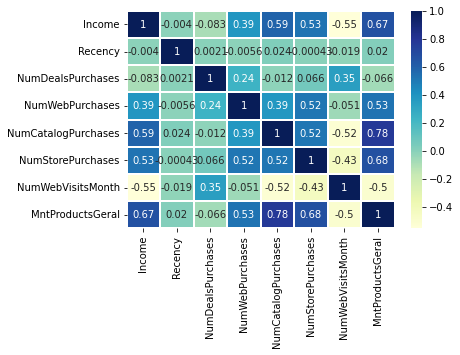

In [43]:
#gera gráfico de calor das correlações sem os produtos
import seaborn as sns

sns.heatmap(df_corr2, annot= True, linewidths= 1, cmap="YlGnBu")

display(df_web.head())

**Vinhos**

In [40]:
corr0 = df_web['MntWines'].corr(df_web['NumWebVisitsMonth'])
corr1 = df_web['MntWines'].corr(df_web['NumCatalogPurchases'])
corr2 = df_web['MntWines'].corr(df_web['NumStorePurchases'])

display(corr0)
display(corr1)
display(corr2)

-0.32197790064085935

0.6347527405610149

0.6400119079346196

**Carnes**


In [38]:
corr0 = df_web['MntMeatProducts'].corr(df_web['NumWebPurchases'])
corr1 = df_web['MntMeatProducts'].corr(df_web['NumCatalogPurchases'])
corr2 = df_web['MntMeatProducts'].corr(df_web['NumStorePurchases'])

display(corr0)
display(corr1)
display(corr2)

0.3070903656363837

0.7341265978631465

0.4860055452848607

**Produtos Classe 'GOLD'**

In [39]:
corr0 = df_web['MntGoldProds'].corr(df_web['NumWebPurchases'])
corr1 = df_web['MntGoldProds'].corr(df_web['NumCatalogPurchases'])
corr2 = df_web['MntGoldProds'].corr(df_web['NumStorePurchases'])

display(corr0)
display(corr1)
display(corr2)

0.407065666192586

0.4424282521483663

0.3891801722259889